In [1]:
import numpy as np
import os
import mne
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import osl
import yaml
from osl.preprocessing.plot_ica import plot_ica

In [ ]:
raw_fif = mne.io.read_raw_fif('/well/woolrich/projects/cichy118_cont/non_maxfiltered/subj02/MEG2_subj02_sess01-0.fif',
                              preload=True)

In [ ]:
raw_fif.info

In [ ]:
# plot psd of raw_fif
raw_fif.plot_psd(fmax=120)

In [2]:
# preprocess the data
config_text = """
meta:
  event_codes:
preproc:
  - filter:         {l_freq: 0.1, h_freq: 250}
  - bad_channels:   {picks: 'mag'}
  - bad_channels:   {picks: 'grad'}
  - ica_raw:        {picks: 'meg', n_components: 64}
"""

subj = 2
outdir = "/well/woolrich/projects/cichy118_cont/preproc_data_osl/subj" + str(subj-1)

osl_outdir = os.path.join(outdir, 'oslpy250hz')
report_dir = os.path.join(osl_outdir, 'report')
os.makedirs(report_dir, exist_ok=True)

In [3]:
config = yaml.load(config_text, Loader=yaml.FullLoader)
path = f'/well/woolrich/projects/cichy118_cont/raw_data/subj{subj:02d}/MEG2_subj{subj:02d}_sess01_tsss_mc-0.fif'
dataset = osl.preprocessing.run_proc_chain(config, path, gen_report=False, outdir=osl_outdir, overwrite=True)

MEG2_subj02_sess01_tsss_mc-0 : OSL osl_logger: handler 'console' level set to 'INFO'
MEG2_subj02_sess01_tsss_mc-0 : logging to file: /well/woolrich/projects/cichy118_cont/preproc_data_osl/subj1/oslpy250hz/MEG2_subj02_sess01_tsss_mc-0/logs/MEG2_subj02_sess01_tsss_mc-0_preproc_raw.log
MEG2_subj02_sess01_tsss_mc-0 : 2023-03-22 15:21:55 : Starting OSL Processing
MEG2_subj02_sess01_tsss_mc-0 : input : /well/woolrich/projects/cichy118_cont/raw_data/subj02/MEG2_subj02_sess01_tsss_mc-0.fif
MEG2_subj02_sess01_tsss_mc-0 : IMPORTING: /well/woolrich/projects/cichy118_cont/raw_data/subj02/MEG2_subj02_sess01_tsss_mc-0.fif
MEG2_subj02_sess01_tsss_mc-0 : Detected fif file format, using: mne.io.read_raw_fif


/gpfs3/well/woolrich/users/yaq921/oslpy/osl/preprocessing/batch.py:107: RuntimeWarning: This filename (/well/woolrich/projects/cichy118_cont/raw_data/subj02/MEG2_subj02_sess01_tsss_mc-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(infile, preload=preload)


MEG2_subj02_sess01_tsss_mc-0 : MNE Stage - raw.filter
MEG2_subj02_sess01_tsss_mc-0 : userargs: {'l_freq': 0.1, 'h_freq': 250}
MEG2_subj02_sess01_tsss_mc-0 : OSL Stage - raw : detect_badchannels
MEG2_subj02_sess01_tsss_mc-0 : userargs: {'picks': 'mag'}
MEG2_subj02_sess01_tsss_mc-0 : Modality mag - 0/102 channels rejected     (0.000000%)
MEG2_subj02_sess01_tsss_mc-0 : OSL Stage - raw : detect_badchannels
MEG2_subj02_sess01_tsss_mc-0 : userargs: {'picks': 'grad'}
MEG2_subj02_sess01_tsss_mc-0 : Modality grad - 0/204 channels rejected     (0.000000%)
MEG2_subj02_sess01_tsss_mc-0 : MNE Stage - mne.preprocessing.ICA
MEG2_subj02_sess01_tsss_mc-0 : userargs: {'picks': 'meg', 'n_components': 64}
MEG2_subj02_sess01_tsss_mc-0 : 2023-03-22 15:43:22 : Processing Complete
MEG2_subj02_sess01_tsss_mc-0 : Output file is /well/woolrich/projects/cichy118_cont/preproc_data_osl/subj1/oslpy250hz/MEG2_subj02_sess01_tsss_mc-0/MEG2_subj02_sess01_tsss_mc-0_preproc_raw.fif


In [7]:
# load raw data
path = outdir + f'/oslpy/MEG2_subj{subj:02d}_sess01_tsss_mc-0_preproc_raw.fif'
raw_proc = mne.io.read_raw_fif(path, preload=True)

# read ica
path = outdir + f'/oslpy/MEG2_subj{subj:02d}_sess01_tsss_mc-0_ica.fif'
ica = mne.preprocessing.read_ica(path)

Opening raw data file /well/woolrich/projects/cichy118_cont/preproc_data_osl/subj0/oslpy/MEG2_subj01_sess01_tsss_mc-0_preproc_raw.fif...
    Range : 154000 ... 1809999 =    154.000 ...  1809.999 secs
Ready.
Opening raw data file /well/woolrich/projects/cichy118_cont/preproc_data_osl/subj0/oslpy/MEG2_subj01_sess01_tsss_mc-0_preproc_raw-1.fif...
    Range : 1810000 ... 3465999 =   1810.000 ...  3465.999 secs
Ready.
Opening raw data file /well/woolrich/projects/cichy118_cont/preproc_data_osl/subj0/oslpy/MEG2_subj01_sess01_tsss_mc-0_preproc_raw-2.fif...
    Range : 3466000 ... 5121999 =   3466.000 ...  5121.999 secs
Ready.
Opening raw data file /well/woolrich/projects/cichy118_cont/preproc_data_osl/subj0/oslpy/MEG2_subj01_sess01_tsss_mc-0_preproc_raw-3.fif...
    Range : 5122000 ... 5162999 =   5122.000 ...  5162.999 secs
Ready.
Reading 0 ... 5008999  =      0.000 ...  5008.999 secs...
Reading /well/woolrich/projects/cichy118_cont/preproc_data_osl/subj0/oslpy/MEG2_subj01_sess01_tsss_mc-0_i

In [13]:
for subj in range(1, 16):
    if subj != 2:
        outdir = "/well/woolrich/projects/cichy118_cont/preproc_data_osl/subj" + str(subj-1)
        # load raw data
        path = outdir + f'/oslpy/MEG2_subj{subj:02d}_sess01_tsss_mc-0_preproc_raw.fif'
        raw_proc = mne.io.read_raw_fif(path, preload=True)

        # save numpy correctly
        path = outdir + f'/subj{subj-1}.npy'
        np.save(path, raw_proc.pick_types(meg=True, exclude=[]).get_data())

Opening raw data file /well/woolrich/projects/cichy118_cont/preproc_data_osl/subj0/oslpy/MEG2_subj01_sess01_tsss_mc-0_preproc_raw.fif...
    Range : 154000 ... 1809999 =    154.000 ...  1809.999 secs
Ready.
Opening raw data file /well/woolrich/projects/cichy118_cont/preproc_data_osl/subj0/oslpy/MEG2_subj01_sess01_tsss_mc-0_preproc_raw-1.fif...
    Range : 1810000 ... 3465999 =   1810.000 ...  3465.999 secs
Ready.
Opening raw data file /well/woolrich/projects/cichy118_cont/preproc_data_osl/subj0/oslpy/MEG2_subj01_sess01_tsss_mc-0_preproc_raw-2.fif...
    Range : 3466000 ... 5121999 =   3466.000 ...  5121.999 secs
Ready.
Opening raw data file /well/woolrich/projects/cichy118_cont/preproc_data_osl/subj0/oslpy/MEG2_subj01_sess01_tsss_mc-0_preproc_raw-3.fif...
    Range : 5122000 ... 5162999 =   5122.000 ...  5162.999 secs
Ready.
Reading 0 ... 5008999  =      0.000 ...  5008.999 secs...
Opening raw data file /well/woolrich/projects/cichy118_cont/preproc_data_osl/subj2/oslpy/MEG2_subj03_sess

In [4]:
raw_proc = dataset['raw']
ica = dataset['ica']

In [5]:
ica_sources = ica.get_sources(raw_proc).get_data()

In [6]:
ica_sources_raw = ica.get_sources(raw_proc)

In [ ]:
# plot the psd of each component in ica_sources
ica_sources_raw.plot_psd(fmax=4, n_fft=100000, picks='misc')
e=0

In [ ]:
%matplotlib widget
plt.plot(ica_sources[13][40000:80000], linewidth=0.5)

In [10]:
ica.exclude = [1, 2, 4, 6]

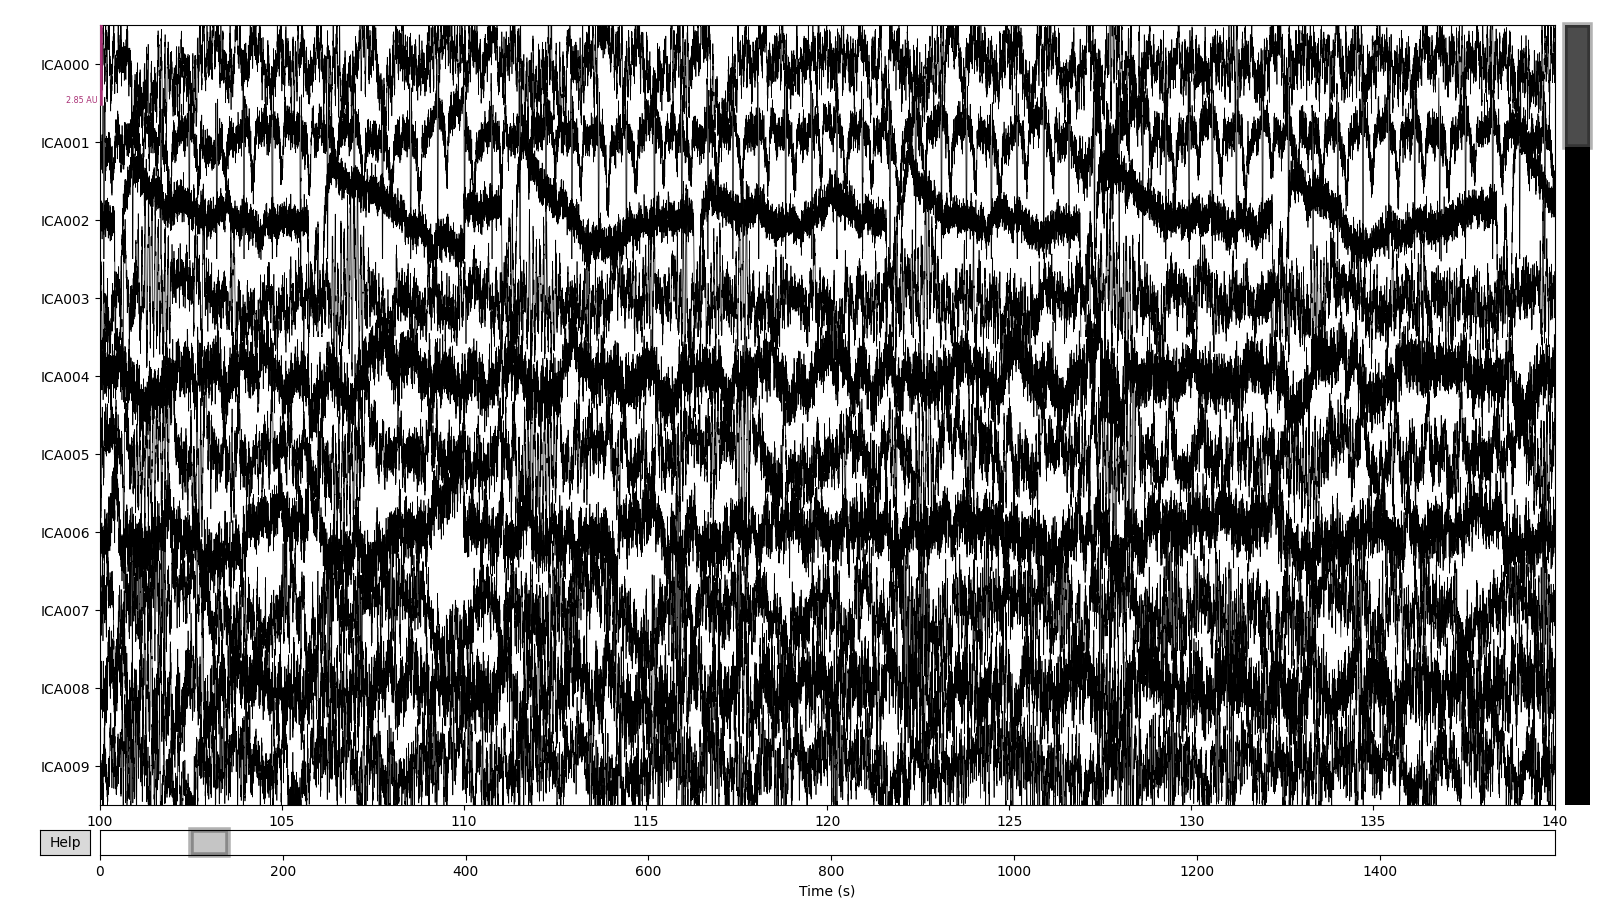

In [9]:
%matplotlib widget
ica_sources_raw.plot(duration=40, start=100, n_channels=10)
e=0

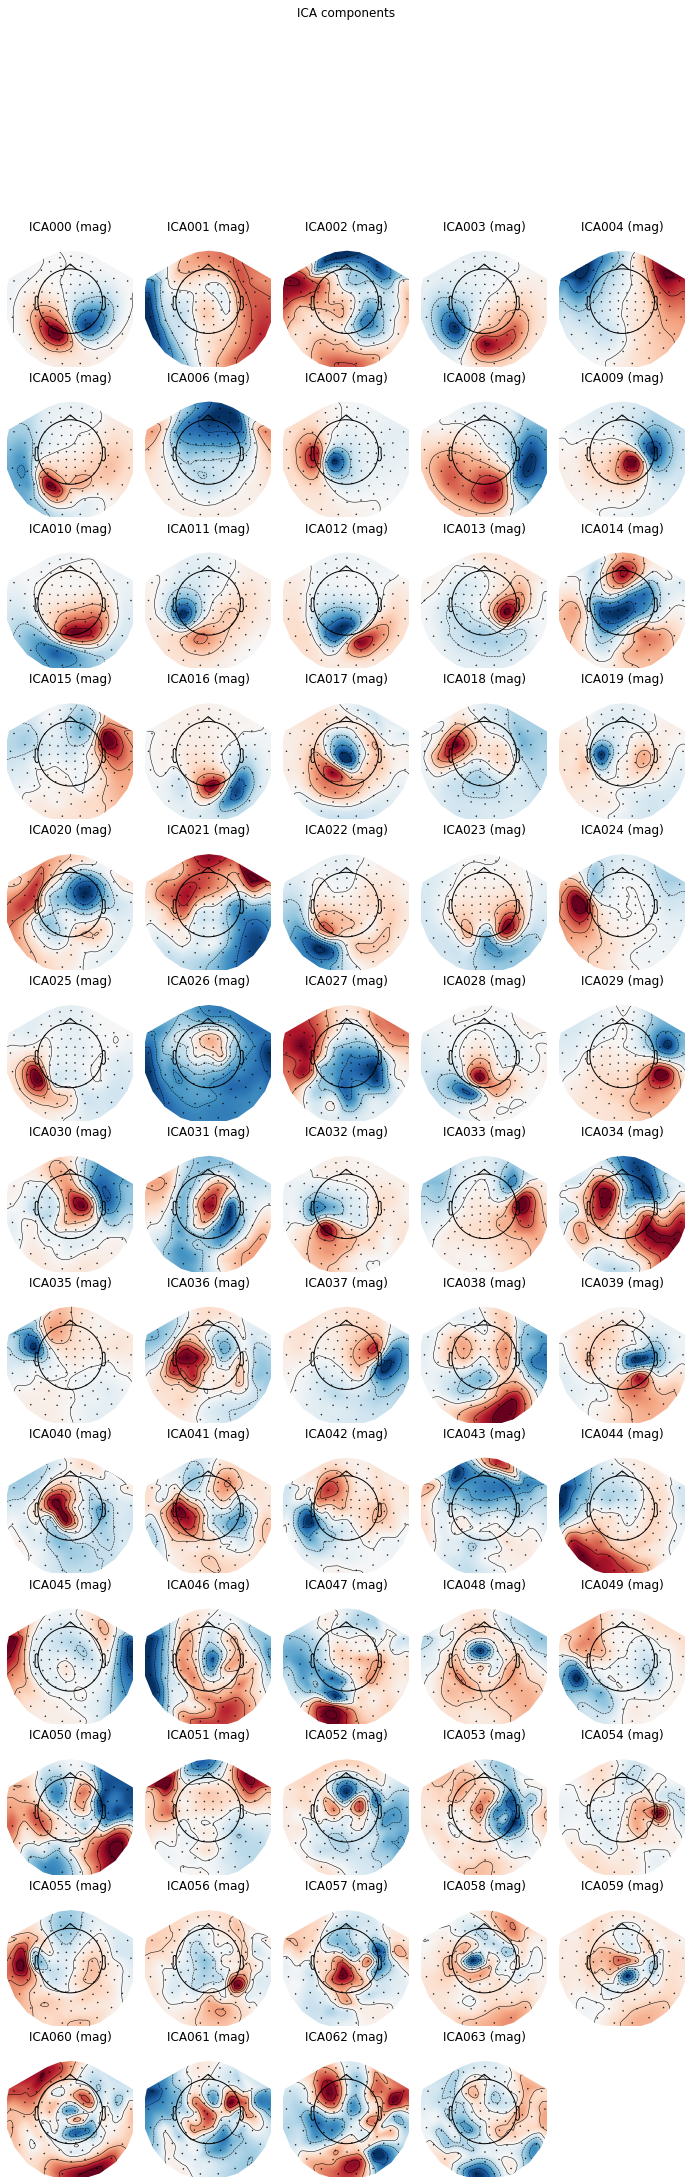

In [7]:
ica.plot_components(picks=list(range(0,64)))
e=0

In [11]:
# apply ICA
raw_proc = ica.apply(raw_proc)

In [12]:
# save raw data
path = outdir + f'/oslpy250hz/MEG2_subj{subj:02d}_sess01_tsss_mc-0_preproc_raw.fif'
raw_proc.save(path, overwrite=True)

In [13]:
# save ica
path = outdir + f'/oslpy250hz/MEG2_subj{subj:02d}_sess01_tsss_mc-0_ica.fif'
ica.save(path, overwrite=True)

Method,fastica
Fit,84 iterations on raw data (5184000 samples)
ICA components,64
Available PCA components,306
Channel types,"mag, grad"
ICA components marked for exclusion,ICA001ICA002ICA004ICA006


In [ ]:
# save raw in numpy array
path = outdir + f'/subj{subj-1}_250hz.npy'
np.save(path, raw_proc.pick_types(meg=True).get_data())

In [ ]:
# read ica
path = outdir + '/oslpy/MEG2_subj02_sess01_tsss_mc-0_ica.fif'
ica = mne.preprocessing.read_ica(path)

In [ ]:
# generate osl report from loaded fif data
path += 'subj1/oslpy/MEG2_subj02_sess01_tsss_mc-0_preproc_raw.fif'
report = osl.report.gen_report_from_fif([path], outdir=report_dir)

In [ ]:
# load raw data
path = '/well/woolrich/projects/cichy118_cont/preproc_data_osl/'
path += 'subj1/oslpy/MEG2_subj01_sess01_tsss_mc-0_preproc_raw.fif'
raw = mne.io.read_raw_fif(path, preload=True)

In [ ]:
# load raw data
path = '/well/woolrich/projects/disp_csaky/RC/task_maxfilter/'
path += 'task_part1_rc_raw_tsss_mc.fif'
raw = mne.io.read_raw_fif(path, preload=True)

In [ ]:
%matplotlib widget
raw.plot_psd(fmax=4, n_fft=50000)
e=0

In [ ]:
%matplotlib widget
raw_proc.plot(n_channels=40, duration=30)
e=0